In [5]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import sys
import warnings
warnings.filterwarnings("ignore")

#options = EdgeOptions()
driver = webdriver.Edge()
driver.maximize_window()
data = pd.DataFrame()

driver.get("https://www.forbes.com/money/")
close = driver.find_element(By.XPATH, value="/html/body/div[8]/div/button")
close.click()
delay = 10 # seconds

count = 1   
#change 200 to other number if needs, as that is indicator for extract more news or less news depend on how many header an desc you look for.

for a in range(1,48):
    # Output to terminal repetitively over the same line using '\r'.
    sys.stdout.write("\rClick More Button Progress: {0}".format(a))
    sys.stdout.flush()
    more_articles = driver.find_element(By.XPATH, value="//button[contains(text(),'More Articles')]")
    more_articles.click()
    wait = WebDriverWait(driver, 10)
    more = wait.until(EC.element_to_be_clickable((By.XPATH, "//button[contains(text(),'More Articles')]")))
    driver.implicitly_wait(0.5)
    
for i in range(1,768):
    sys.stdout.write("\rItem: {0}".format(count))
    sys.stdout.flush()
    try:
        #print('get value {0}'.format(count))
        header = driver.find_element(By.XPATH, value="//*[@id=\"row-2\"]/div/div/div/div[1]/div/div/article[{0}]/div[1]/h3/a".format(count))
        desc = driver.find_element(By.XPATH, value="//*[@id=\"row-2\"]/div/div/div/div[1]/div/div/article[{0}]/div[1]/div[2]".format(count)) 
        author_label = driver.find_element(By.XPATH, value="//*[@id=\"row-2\"]/div/div/div/div[1]/div/div/article[{0}]/div[1]/div[3]/div/span/div/div/a".format(count))
        author = author_label.text
    except:
        author = ""
        header = ""
        desc = ""
            #print('Error 1')

    date_value = None
    try:
        date_element = driver.find_element(By.XPATH, value="/html[1]/body[1]/div[1]/main[1]/div[1]/section[1]/section[4]/div[1]/div[1]/div[1]/div[1]/div[1]/div[1]/article[{0}]/div[1]/div[1]".format(count))

        if date_element.is_displayed():
            date_value = date_element.text
        else:
            date_element = driver.find_element(By.XPATH, value="/html[1]/body[1]/div[1]/main[1]/div[1]/section[1]/section[4]/div[1]/div[1]/div[1]/div[1]/div[1]/div[1]/article[{0}]/div[1]/div[2]".format(count))
            date_value = date_element.text


    except:
        date_value=""
        #print('Error 2')

    if header != "":
        #print('store value {0}'.format(count))
        record = pd.DataFrame({
                                    'header':header.text,
                                    'desc': desc.text,
                                    'author': author,
                                    'date': date_value
                                }, index=[0])
        data = pd.concat([data, record],ignore_index=True, axis=0)
    count = count + 1
    
print('Completed load all articles.')

driver.quit()
data.reset_index()
#data.drop(columns=data.columns[0], axis=1, inplace=True)
data.to_csv(r"data/{0}_new_data.csv".format('forbes_money_news_raw'), sep="\t")
data

Item: 767e Button Progress: 47Completed load all articles.


,header,desc,author,date
0,Singapore Tycoon Kwek Leng Beng’s CDL Suburban...,City Developments has sold 77% of its resident...,Jonathan Burgos,3 hours ago
1,"Billionaire Ng Family’s Far East, Perennial To...",Far East Organization and Sino Land have partn...,Jonathan Burgos,6 hours ago
2,Hong Kong Stock Exchange Closed For Buddha’s B...,Bourses in mainland China remain open,Russell Flannery,7 hours ago
3,On the 61st Anniversary Of His ‘Vast Wasteland...,Congress's answer 55 years ago to Newt Minow's...,Robert Hockett,12 hours ago
4,"Stocks This Week: Sell Short Bed, Bath, And Be...",A tradable low is unlikely until late June. He...,Bill Sarubbi,12 hours ago
...,...,...,...,...
437,Proceed With Caution With Flashing Yellow Ligh...,When you google “economy” today there are two ...,Frank Sorrentino,"Apr 25, 2022"
438,Procter & Gamble Named Top 25 SAFE Dividend St...,Procter & Gamble has been named to the Dividen...,Dividend Channel,"Apr 25, 2022"
439,Is Adobe Stock Attractive At Current Levels?,The company posted better than expected result...,Trefis Team,"Apr 25, 2022"
440,Note To Paul Krugman: Wage-Price Spiral Could ...,With prices and wages rising faster than they ...,Peter Cohan,"Apr 25, 2022"


# Data Processing

Manual process to clean up the data that extract from above script. We replace the data to a proper format such as 2 hours ago to specific date that extract on that day in order the data can be use in time series analysis later. 

In [7]:
import datetime as dt
from datetime import date
import numpy as np

news = pd.read_excel(r"data/forbes_news_new.xlsx")

In [8]:
news

,number,label,header,desc,author,date
0,0,Finance,Singapore Tycoon Kwek Leng Beng’s CDL Suburban...,City Developments has sold 77% of its resident...,Jonathan Burgos,"May 9, 2022"
1,1,Finance,"Billionaire Ng Family’s Far East, Perennial To...",Far East Organization and Sino Land have partn...,Jonathan Burgos,"May 9, 2022"
2,2,Stock Market,Hong Kong Stock Exchange Closed For Buddha’s B...,Bourses in mainland China remain open,Russell Flannery,"May 9, 2022"
3,3,Finance,On the 61st Anniversary Of His ‘Vast Wasteland...,Congress's answer 55 years ago to Newt Minow's...,Robert Hockett,"May 9, 2022"
4,4,Stock Market,"Stocks This Week: Sell Short Bed, Bath, And Be...",A tradable low is unlikely until late June. He...,Bill Sarubbi,"May 9, 2022"
...,...,...,...,...,...,...
406,406,Stock Market,Why We’re Revisiting Our Stance On Tesla Stock,While revenue growth was led primarily by surg...,Trefis Team,"Apr 26, 2022"
407,407,Stock Market,"After An 80% Correction, Rivian Stock Is Still...",Rivian stock has now seen a sizeable correctio...,Trefis Team,"Apr 26, 2022"
408,408,Finance,Europe Faces Higher Recession Risks Than U.S.A.,Europe's reliance on imported energy is just p...,Simon Constable,"Apr 26, 2022"
409,409,Finance,Charging Order Against Out-Of-State LLCs Allow...,The U.S. District Court for the District of Ut...,Jay Adkisson,"Apr 26, 2022"


In [9]:
start = dt.datetime(2022,4,26)
end = dt.datetime(2022,5,9)

def filter_news_by_date(start, end, data):
    data.date = pd.to_datetime(data.date)
    data = data[(data['date'] >= start) & (data['date'] <= end)]
    data = data.set_index('date') 
    data = data.sort_index()
    data = data.reset_index()
    #data = data.set_index('date')
    return data

In [10]:
def filter_discord_by_date(start, end, data):
    data.date = pd.to_datetime(data.Date)
    data = data[(data['Date'] >= start) & (data['Date'] <= end)]
    data = data.set_index('Date') 
    data = data.sort_index()
    data = data.reset_index()
    #data = data.set_index('date')
    return data

In [11]:
news_target_date = filter_news_by_date(start, end, news)
news_target_date

,date,number,label,header,desc,author
0,2022-04-26,410,Finance,Singapore’s GIC Buying Stake In London’s Paddi...,Singaporean sovereign wealth fund GIC has agre...,Jonathan Burgos
1,2022-04-26,384,Cryptocurrencies,What You Should Know Before Investing In Fidel...,This morning crypto advocates and the crypto c...,Steven Ehrlich
2,2022-04-26,383,Finance,Student Loan Forgiveness: 4 People Likely To O...,Here are 4 people who are likely to oppose mas...,Zack Friedman
3,2022-04-26,382,Finance,Home Buying Is Becoming ‘Unaffordable For Most...,Monthly mortgage payments are up nearly $500 s...,Sergei Klebnikov
4,2022-04-26,381,Finance,Examining The Ukrainian Tax Implications Of Ru...,Valeria Tarasenko of Dentons Kyiv discusses th...,Tax Notes Staff
...,...,...,...,...,...,...
406,2022-05-09,12,Cryptocurrencies,Analyst Believes Bitcoin Could Soon Fall To $3...,"Carter Braxton Worth, a technical analyst, bel...",Chuck Jones
407,2022-05-09,13,Stock Market,The Best Mid-Cap Dividend Stocks For 2022,Mid-cap dividend stocks are the best bargain o...,Brett Owens
408,2022-05-09,14,Finance,How To Optimize The Energy We Put Into Financi...,Studies suggest that up to 80% of financial pl...,Tim Maurer
409,2022-05-09,7,Finance,Ask Larry: Will The 2022 COLA Apply To Benefit...,Today's Social Security column addresses quest...,Laurence Kotlikoff


### Manual process to label news category.
Split the news into crypto, finance, stock market and metaverse category. Break down to specific news in order for us to find what news is more sensitive for price impact. 

In [106]:
news = pd.read_excel(r"data/forbes_news_category.xlsx")
news = news.drop(['Column1'], axis=1)
news['category'] = np.where(news.category == 'Metaverse', 'Cryptocurrencies', news.category)
news_target_date = filter_news_by_date(start, end, news)
news_target_date

,date,category,content,sentiment_score
0,2022-03-09,Finance,singapore billionaire ron sim revamps v3 group...,0.054624
1,2022-03-09,Finance,startup upstream raises .5 million dao box web...,0.146132
2,2022-03-09,Finance,tencent meituan jd.com kuaishou lead hong kong...,0.972386
3,2022-03-09,Stock Market,google cloud sneaky smart double security alph...,0.120387
4,2022-03-09,Finance,russia ukraine war affect finances . . impact ...,-0.317629
...,...,...,...,...
1505,2022-04-25,Stock Market,procter gamble named top 25 safe dividend stoc...,0.136002
1506,2022-04-25,Finance,proceed caution flashing yellow lights comes e...,0.754997
1507,2022-04-25,Cryptocurrencies,tesla billionaire elon musk suddenly sent pric...,0.684225
1508,2022-04-25,Finance,europe america policy failure seems unavoidabl...,-0.962441


In [107]:
news_target_date.groupby(['category']).size().reset_index(name='counts')

,category,counts
0,Cryptocurrencies,193
1,Finance,972
2,Stock Market,345


## Read Discord data

In [90]:
StepN_Announcement = pd.read_csv(r"data/STEPN_Announcement.csv")
StepN_Announcement["Date"] = StepN_Announcement["Date"].apply(lambda x: pd.to_datetime(x, unit="ns", utc=True).floor('D').date())
StepN_Announcement["Date"] = StepN_Announcement["Date"].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d'))
StepN_Announcement=filter_discord_by_date(start, end, StepN_Announcement)

C:\Users\eikde\AppData\Local\Temp\ipykernel_38900\2809073539.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.date = pd.to_datetime(data.Date)


In [83]:
len(StepN_Announcement)

230

In [84]:
StepN_Announcement.head()

,AuthorID,Author,Date,Content,Attachments,Reactions
0,897354426937901087,STEPN#7605,2021-11-10,NaN,NaN,"🚀 (1),🇻🇳 (1),🥁 (1),🇮🇩 (1),🇯🇵 (1),🇮🇳 (1),👽 (1)"
1,372422575818539029,GilNextDoor#1263,2021-11-21,First day here? Super confused and not sure wh...,NaN,"👍 (1),🥁 (1),🇻🇳 (1),__ (1),🇯🇵 (1),🇮🇳 (1),☠️ (1)"
2,372422575818539029,GilNextDoor#1263,2021-12-03,**ANNOUNCEMENT**: \n\nWe'll be hosting our fir...,NaN,"__ (1),🥁 (1),🇮🇳 (1),👍 (1),🔥 (1)"
3,897354426937901087,STEPN#7605,2021-12-06,NaN,NaN,NaN
4,897354426937901087,STEPN#7605,2021-12-07,NaN,NaN,"partysneaker (1),🤪 (1),👀 (1),Fire5_Orange (1),..."


In [92]:
StepN_General = pd.read_csv(r"data/STEPN_General.csv")
StepN_General["Date"] = StepN_General["Date"].apply(lambda x: pd.to_datetime(x, unit="ns", utc=True).floor('D').date())
StepN_General["Date"] = StepN_General["Date"].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d'))
StepN_General=filter_discord_by_date(start, end, StepN_General)

C:\Users\eikde\AppData\Local\Temp\ipykernel_38900\2809073539.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.date = pd.to_datetime(data.Date)


In [93]:
len(StepN_General)

533173

In [94]:
StepN_General.head()

,Date,AuthorID,Author,Content,Attachments,Reactions
0,2022-03-09,927771714241310731,STEPN-assistant#3187,1 minute remaining before the hourly quiz at #...,NaN,NaN
1,2022-03-09,767117463892000798,kkaligulas#1235,Go to annoucement channel,NaN,NaN
2,2022-03-09,904208241238609950,STEPN#0000,NaN,NaN,NaN
3,2022-03-09,904208241238609950,STEPN#0000,NaN,NaN,NaN
4,2022-03-09,927771714241310731,STEPN-assistant#3187,Question starts in 30 seconds.,NaN,NaN


In [100]:
import matplotlib.pyplot as plt
def visualize(df, column_name='date', color='#494949', title=''):
    """
    Visualize a dataframe with a date column.

    Parameters
    ----------
    df : Pandas dataframe
    column_name : str
        Column to visualize
    color : str
    title : str
    """
    plt.figure(figsize=(20, 10))
    ax = (df[column_name].groupby(df[column_name].dt.date)
                         .count()).plot(kind="bar", color=color)
    ax.set_facecolor('#eeeeee')
    ax.set_xlabel("date", fontsize=18)
    ax.set_ylabel("count", fontsize=18)
    ax.set_title(title, fontsize=18)
    plt.xticks(rotation = 45) 
    plt.show()

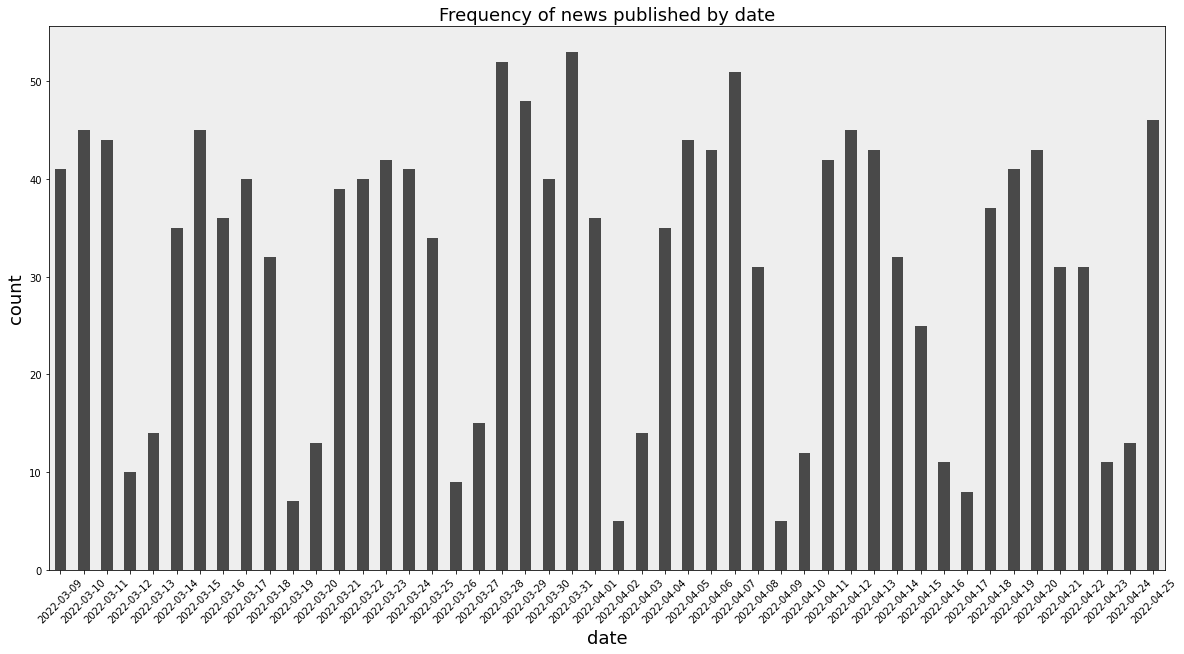

In [129]:
visualize(news_target_date, title='Frequency of news published by date')

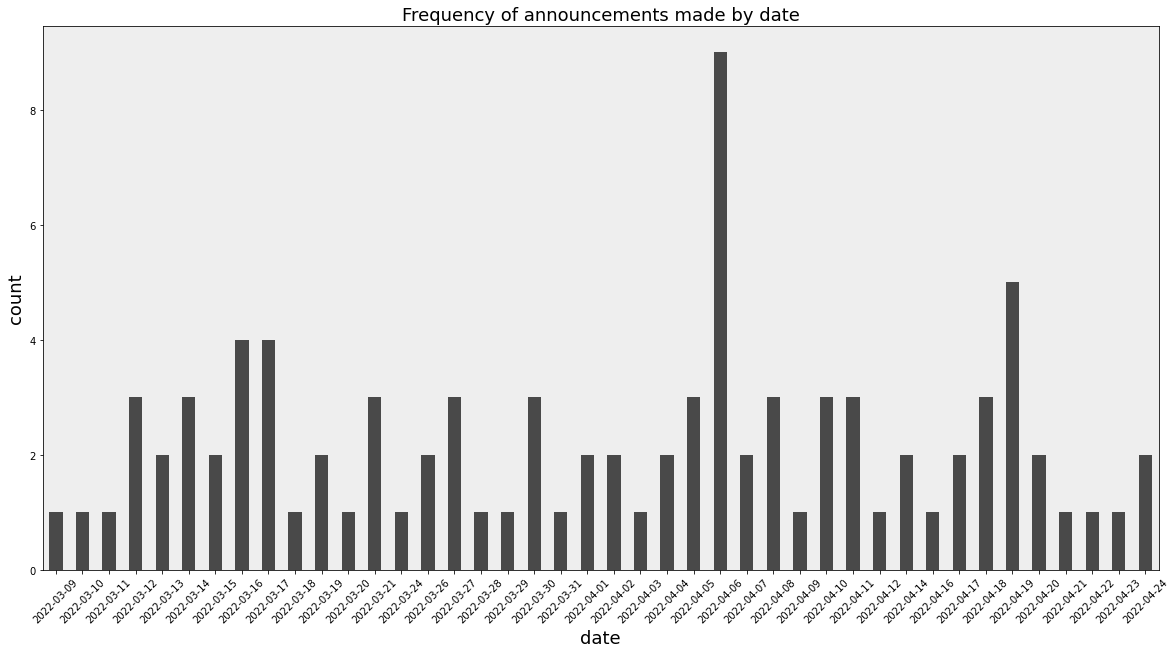

In [102]:
visualize(StepN_Announcement, column_name="Date", title='Frequency of announcements made by date')

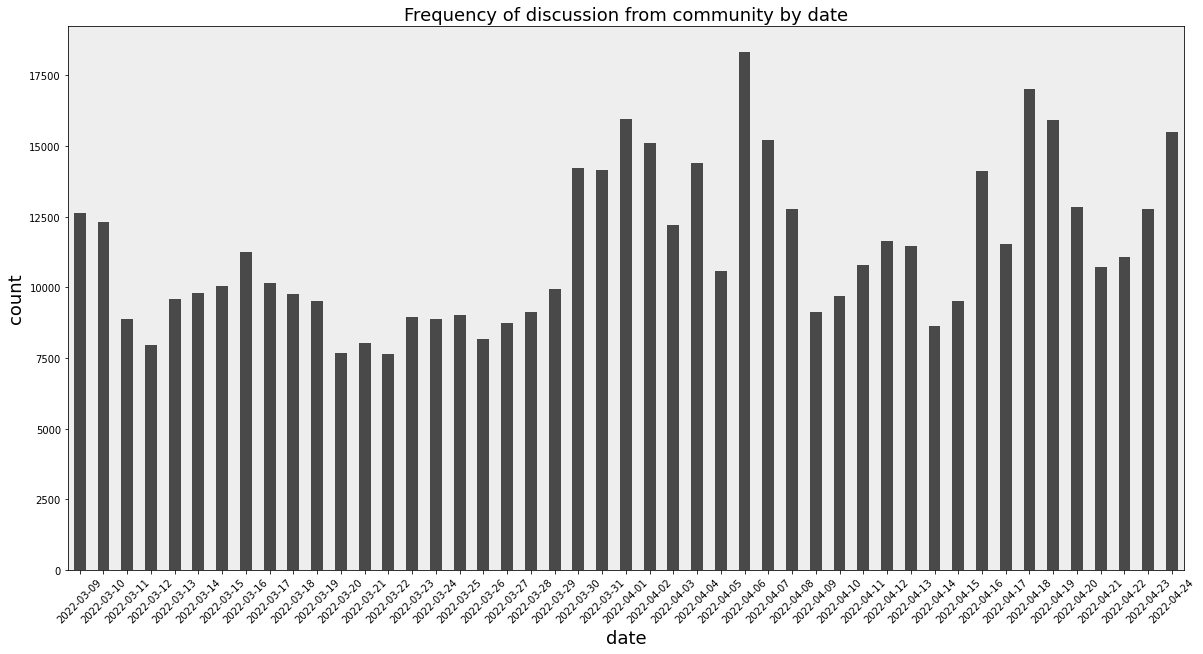

In [103]:
visualize(StepN_General, column_name="Date", title='Frequency of discussion from community by date')